In [1]:
import urllib2
import json
import re
import io
import copy
import nltk, re, pprint
import string
import os
import time
import calendar
import datetime
from threading import Thread
from time import sleep
from __future__ import division
import codecs

The overall goal of the project is to find trends within the movie-business. Therefore we are very interested in finding correlations between differn't movie attributes which a part of our dataset.
We will now extract all the related data from our dataset and make some plots to try and visualize the possible correlations. However our main focus will be to utilize the very usefull Panda package to do the correlation calculations between all attributes using Panda Dataframes.

<h3>SENTIMENT</h3>

An interesting attribute to look into is the average sentiment-score for the reviews of a film.
By calculating the sentiment-score, we can see whether more positive reviews are an indicatior of a higher grossing movie or maybe that the movie-score are directly correlated to how people write about a movie.

The sentiment scores are calculated using LabMT wordlist. It's available as supplementary material from Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter (Data Set S1).
Which can be downloaded from http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752.

We were inspired by another group during assignment 2 in which they too used the LabMT wordlist, but had some great code that improved on the efficiency. Due to the fact that assignments are anonymized we cannot credit them, but we have utilized their code in next two cells.

In [2]:
#COPY CODE
# the LabMT wordlist can now be found at the path below.
# PREPARING THE DATA SET 
labmt = open('Data_Set_S1.txt','r').read()
labmt  =nltk.word_tokenize(labmt) # the set is tokenized, to be able to access the values as list elements
#labmt[labmt.index('laughter')+1]
labmt = labmt[labmt.index('laughter'):] # A little hard coding to remove problematic text from labmt set
# EXTRACT ONLY THE WORDS FROM THE DATA SET
words_in_labmt = re.findall('[\D]+',' '.join(labmt).translate(None, string.punctuation)) # find all words that are not digits                                                                                          #and remove punctuation
words_in_labmt = re.findall('[\S]+',' '.join(words_in_labmt)) # exclude whitespaces

In [3]:
#COPY CODE
#REMOVE ANY WORDS THAT HAVE BEEN GENERATED ABOVE, THAT ARE NOT IN LABMT
remove = set() # set of words to exclude from 'words_in_labmt'
labmt_valence = {} # dictionary to contain words from 'words_in_labmt' as keys and their corresponding valence as values.
for word in words_in_labmt: 
    if word not in labmt: 
        remove.add(word)  # add word to remove to 'remove' set
    else:
        valence = float(labmt[labmt.index(word)+2])  # get valence score from labmt
        if valence <= 10.0:          # check that valence score is within the expected interval. 
            labmt_valence[word] = valence               
        else: remove.add(word)   
# exclude the words in 'remove'-set from 'words_in_labmt':
words_in_labmt = set(words_in_labmt).difference(set(remove)) 

In [4]:
#Function for calculating the sentiment of a given list of tokens.
#Goes through each token in the list and adds it's sentiment value to the total.
#It then returns the total sentiment value divided by the number of words in the list,
#which is the average sentiment of the entire token list.
from __future__ import division
def sentiment(tokenList):
    sentimentScore = 0.0
    for w in tokenList:
        if w in words_in_labmt:
            word = w.lower()
            sentimentScore = sentimentScore + float(labmt_valence.get(word))
    if sentimentScore == 0.0:
        print "No Sentiment Words"
        return sentimentScore
    else:
        return sentimentScore/len(tokenList)

In [7]:
#Loop through all reviews and get their sentiement score
movieSentiment = {}
for f in os.listdir("DoneMovies/"):
    with codecs.open("DoneMoviesReviews/" + f[:-4] + ".txt", "r", "utf-8") as myfile:
        data=myfile.read().replace('\n', '')
        data=data.replace("<|_=00=_|>", "")
        data= re.sub('[^a-zA-Z0-9-_*.]', ' ', data)
        #Save the movie ID and the sentiment score in a dictonary
        movieSentiment[""+f[:-4]]=sentiment(data)

We have calculated the sentiment-score for all movies. The result suprised us as we had expected that the sentiment score would  have a large interval with some (surposed bad movies) scoring in the bottom while other movies would be in the top. This however didn't occur and instead the interval only runs from 3.62 to 4.05. One explanation could be that it our review text wasn't large enough to get a good interpretation of the score or maybe the user written reviews had too many typos that it started to effect the score.

In [8]:
print sorted(movieSentiment.values())[:10]
print sorted(movieSentiment.values(), reverse = True)[:10]

[3.6179115584017802, 3.6542073793202716, 3.680612808408223, 3.687155570424743, 3.688344827586197, 3.691254752851643, 3.69287356321839, 3.7023720552396417, 3.702385396276194, 3.708941592920214]
[4.054541108986618, 4.015226411075605, 4.011636243821866, 4.0020534790958555, 3.993211626574829, 3.987272583075448, 3.98676448073465, 3.983348328481988, 3.982735312341372, 3.9813453318334786]


<h3>SCORE</h3>
The movie-score is a great way to get an understanding of how people perceive a movie and be able to seperate good and bad movies from each other. 

In [9]:
movieScore = {}
for f in os.listdir("DoneMovies/"):
    jsondata = io.open("DoneMovies/" + f, 'r', encoding='utf-8')
    sidensJson = json.load(jsondata)
    movieScore[""+f[:-4]]=sidensJson["vote_average"]
    jsondata.close()

The scores are very diverse with an interval from 1.9 to 10.0 and thereby great to se if there is an correlation.

In [10]:
print sorted(movieScore.values())[:10]
print sorted(movieScore.values(), reverse = True)[:10]

[1.9, 2.0, 2.3, 2.6, 2.8, 3.0, 3.0, 3.0, 3.0, 3.0]
[10.0, 9.0, 8.7, 8.6, 8.5, 8.5, 8.5, 8.4, 8.3, 8.3]


<h3>Budget</h3>

In [11]:
movieBudget = {}
for f in os.listdir("DoneMovies/"):
    jsondata = io.open("DoneMovies/" + f, 'r', encoding='utf-8')
    sidensJson = json.load(jsondata)
    movieBudget[""+f[:-4]]=sidensJson["budget"]
    jsondata.close()

The budgets has a high varity going from tens-of-thousands to hundreds-of-millions which tells us that we are working with both indie movies as well as big blockbusters.

In [12]:
print sorted(movieBudget.values())[:10]
print sorted(movieBudget.values(), reverse = True)[:10]

[10000, 11178, 11180, 15000, 17000, 20000, 22361, 22361, 22361, 24554]
[380000000, 300000000, 280000000, 270000000, 260000000, 260000000, 258000000, 255000000, 250000000, 250000000]


<h3>REVENUE</h3>

In [13]:
movieRevenue = {}
for f in os.listdir("DoneMovies/"):
    jsondata = io.open("DoneMovies/" + f, 'r', encoding='utf-8')
    sidensJson = json.load(jsondata)
    movieRevenue[""+f[:-4]]=sidensJson["revenue"]
    jsondata.close()

The income has a high varity going from tens-of-thousands to billions.

In [14]:
print sorted(movieRevenue.values())[:10]
print sorted(movieRevenue.values(), reverse = True)[:10]

[10000, 10018, 10289, 10300, 10474, 11276, 11455, 12000, 12762, 13308]
[2787965087L, 2068223624, 1845034188, 1519557910, 1513528810, 1506249360, 1405403694, 1342000000, 1274219009, 1262886337]


<h3>Gross Income<h3>

In [15]:
movieIncome = {}
for f in os.listdir("DoneMovies/"):
    jsondata = io.open("DoneMovies/" + f, 'r', encoding='utf-8')
    sidensJson = json.load(jsondata)
    movieIncome[""+f[:-4]]=(sidensJson["revenue"] - sidensJson["budget"])
    jsondata.close()

The gross income has a high varity going from losses of millions to profits of billions which tells us that we are working with both very successfull movies as well as large commerical failures.

In [16]:
print sorted(movieIncome.values())[:10]
print sorted(movieIncome.values(), reverse = True)[:10]

[-165710090, -119180039, -111007242, -98301101, -92896027, -87982678, -85321445, -84540684, -80445998, -79627709]
[2550965087L, 1823223624, 1645034188, 1363528810, 1316249360, 1299557910, 1217000000, 1125403694, 1124219009, 1102886337]


<h3>Gross Income Ratio</h3>

The gross income ratio is a funny attribute as tells whether a movie is a huge sleeper hit, with a very low-budget but a huge income which should make for some big varity in the values.

In [17]:
movieIncomeRatio = {}
for f in os.listdir("DoneMovies/"):
    jsondata = io.open("DoneMovies/" + f, 'r', encoding='utf-8')
    sidensJson = json.load(jsondata)
    movieIncomeRatio[""+f[:-4]]=(sidensJson["revenue"] / sidensJson["budget"])
    jsondata.close()

As expected the values makes a great interval with the low-end ratio's under 1 to insanely high ratio's going as high as 12890. 

In [18]:
print sorted(movieIncomeRatio.values())[:10]
print sorted(movieIncomeRatio.values(), reverse = True)[:10]

[0.00051445, 0.00087395, 0.0011339384615384614, 0.0012, 0.0012882424242424242, 0.0013586666666666667, 0.0014, 0.0015333333333333334, 0.0017472, 0.00205725]
[12890.386666666667, 4133.333333333333, 700.0, 439.6165846153846, 426.6441, 420.52272307692306, 262.8199991055856, 250.0, 215.3846153846154, 155.84255]


<h3>SCATTER PLOTS</h3>

We will make some scatterplots to illustrate some of the more interesting correlations that we wish to investigate.

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

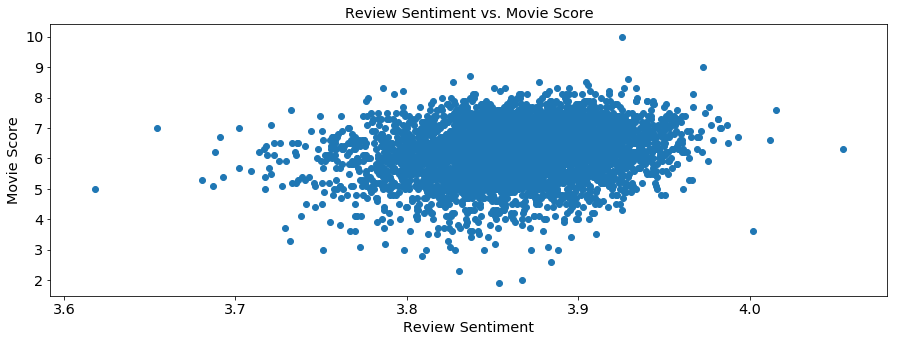

In [26]:
plt.scatter(movieSentiment.values(), movieScore.values())
plt.title("Review Sentiment vs. Movie Score")
plt.xlabel("Review Sentiment")
plt.ylabel("Movie Score")
plt.show()

The graph shows a scatter-plot between Review Sentiment and Movie Score. The plot shows that there is a small-ish correlation going towards one which means that when a movies score is high, there more then average that results in the reviews also using more sentimental words.

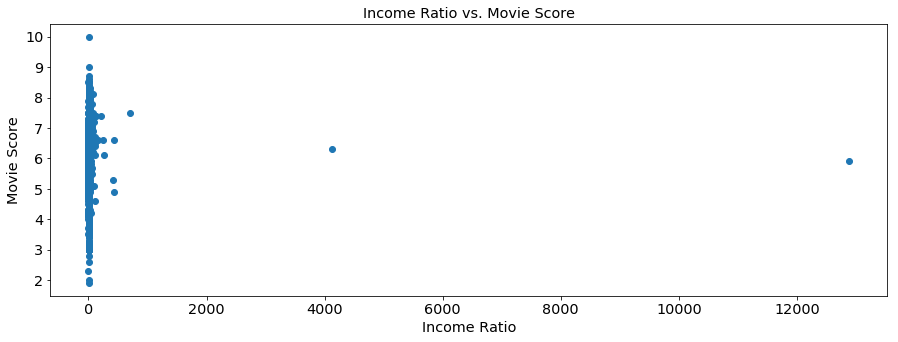

In [28]:
plt.scatter(movieIncomeRatio.values(), movieScore.values())
plt.title("Income Ratio vs. Movie Score")
plt.xlabel("Income Ratio")
plt.ylabel("Movie Score")
plt.show()

We were interested in whether there could be an correlation between the income ratio and the movie scores as to say that the movies people like the most also makes the most money back. However due to the insane value interval there exist some outliers that makes it hard to come any conclusion. To amend this we will make another plot where we limit the income ratio to at most 75.

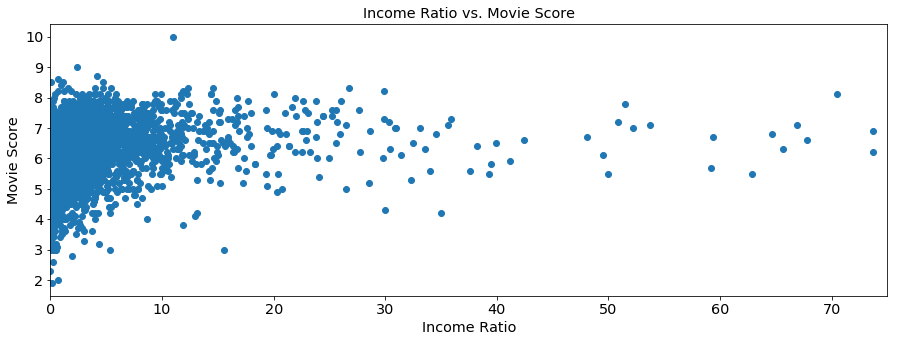

In [29]:
plt.scatter(movieIncomeRatio.values(), movieScore.values())
plt.title("Income Ratio vs. Movie Score")
plt.xlabel("Income Ratio")
plt.ylabel("Movie Score")
plt.xlim([0,75])
plt.show()

The scatterplot shows that there dosen't exist a correlation between the two attributes, seeing as the plot levels out around the movie score of 6.0-7.0.

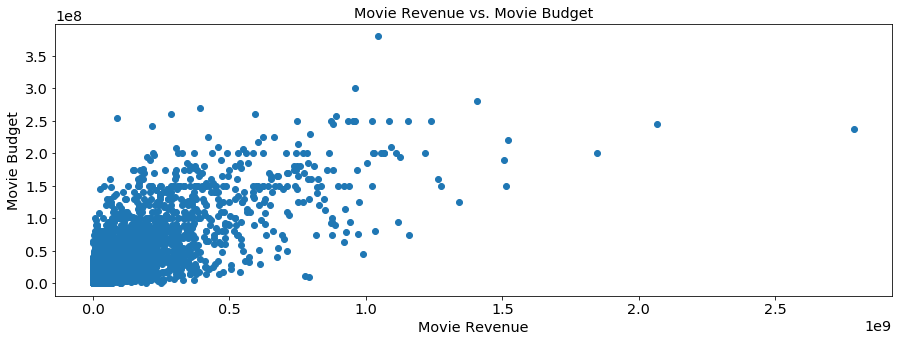

In [30]:
plt.scatter(movieRevenue.values(), movieBudget.values())
plt.title("Movie Revenue vs. Movie Budget")
plt.xlabel("Movie Revenue")
plt.ylabel("Movie Budget")
plt.show()

The most important correlation for developing movies is whether revnue and budgets has an impact on each other. The scatter-plot shows a clear positive correlation which tells us that pouring money into a movie more often then not means that it will directly influence the income later on.

<h3>Attribute Correlation</h3>

The actual correlations will be calculated using the Panda DataFrame. Due to the fact that all movies had its attributes collected in the same order we can simply give the DataFrame the values of each dictionary and have them match up.

In [23]:
import pandas as pd

In [31]:
datamatrix = pd.DataFrame({'User Score': movieScore.values(),'Sentiment': movieSentiment.values(),'Budget': movieBudget.values(), 'Gross Income': movieIncome.values(), 'Income Ratio': movieIncomeRatio.values(), 'Revenue': movieRevenue.values()})

In [32]:
datamatrix.corr()

,Budget,Gross Income,Income Ratio,Revenue,Sentiment,User Score
Budget,1.000000,0.582307,-0.022553,0.727765,-0.069845,0.069169
Gross Income,0.582307,1.000000,0.025510,0.981338,-0.063111,0.259909
Income Ratio,-0.022553,0.025510,1.000000,0.016186,-0.016669,0.002273
Revenue,0.727765,0.981338,0.016186,1.000000,-0.069761,0.235622
Sentiment,-0.069845,-0.063111,-0.016669,-0.069761,1.000000,0.216589
User Score,0.069169,0.259909,0.002273,0.235622,0.216589,1.000000


The outcome of the correlation-matrix for the movie attributes gave some interesting results. Firstly as earlier show in the scatter-plots the budget and income has high correlation with each other. This also the case with the gross income, which isn't suprising considering it was calculated using both of them. However the income ratio shows no correlation at all between any of the other attributes which is a surprise. The most interesting results came with the sentiment and user scores. The sentiment didn't have a correlation to the income or budget of any movies but showed a correlation with the movie score which proves the hypothesis that people who like a movie more tends to write more sentimentality about it. The user score in contrast to the sentiment showed smaller correlations with the revenue and gross income which tells us that the more people like a movie the more likely it is to make money.